In [1]:
# importing packages

import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import numpy as np
import folium

# Primary Research Questions

## 1. How has sheriff violence changed over time compared to police violence?

## 2. Where is sheriff violence happening? Are there spatial trends?

# Introduction to Research Topic

This project is a continuation of my work on Constitutional Sheriffs in the United States. For background, Constitutional Sheriffs are elected county sheriffs that believe and act as thought the county sheriff is the highest authority - higher than both the state and federal government. These sheriffs are self-described and are often tracked through membership in constitutional sheriff groups, but this data is not published. 

This project provides a proof of concept that sheriff violence can be analyzed quantitativly using Python coding for my methodology. The next steps for this project, addressed in this notebook is a temporal analysis of sheriff violence in the United States, which will later be incorproated into my geospatial analysis research.

## Importing Data and Preliminary Exploration

The first part of any data project is downloading data and taking a look at the format and contents of the data.This project draws on several datasets relating to police and sheriff violence in the United States.

The first dataset is the [Mapping Police Violence database](https://mappingpoliceviolence.org/). This is a collection of data on civilians killed by police or sheriff officers since 2013. The dataset has over 10,000 entries with information such as the name of the victim, the agency responsible, and the lat and long location of the death.

The second dataset is the [UCLA Law COVID 19 Behind Bars dataset](https://uclacovidbehindbars.org/intro-carceral-mortality). This dataset is primarly focued on collecting information relating to deaths within US federal prisons. Relating to sheriff violence, there are a few points of data relating to deaths within county prisons. This data, collected by facility, will be extracted for analysis. 

In [2]:
mpv = pd.read_csv('https://raw.githubusercontent.com/lindseyrogers/DH140_final_sheriffs/main/MPV_Simplified2.csv')
mpv

,name,age,gender,race,date,street_address,city,state,zip,county,...,wapo_armed,wapo_threat_level,wapo_flee,wapo_body_camera,encounter_type,initial_reason,officer_names,call_for_service,latitude,longitude
0,Warren Merriman,NaN,Male,NaN,12/28/2022,100 block of East 4th Street,San Bernardino,CA,92410.0,San Bernardino,...,Knife,Sudden Threatening Movement,Not Fleeing,Yes,Part 1 Violent Crime/Domestic disturbance,"domestic violence incident, assault",NaN,Yes,34.106475,-117.284968
1,Terry L. Bowman,39.0,Male,White,12/28/2022,15000 block of U.S. 40 Highway,Independence,MO,64015.0,Jackson,...,NaN,Brandished Weapon,Not Fleeing,NaN,Person with a Weapon,Suspicious Vehicle,NaN,No,39.008752,-94.299621
2,Monet Darrisaw,34.0,Female,Black,12/27/2022,intersection of West Boulevard and Donald Ross...,Charlotte,NC,28208.0,Mecklenburg,...,NaN,None,Car,NaN,Traffic Stop,Suspicious Vehicle,NaN,No,35.212482,-80.893267
3,Trevontay Jenkins,16.0,Male,NaN,12/26/2022,400 E. McKinley Ave,Des Moines,IA,50315.0,Polk,...,NaN,Brandished Weapon,Not Fleeing,Yes,Person with a Weapon,Domestic Disturbance,"Noah Bollinger, Zachary Duitscher, Thomas Garcia",Yes,41.540948,-93.620034
4,Zachary D. Zoran,34.0,Male,White,12/26/2022,500 block of W. Hopocan Avenue,Barberton,OH,44203.0,Summit,...,Knife,Brandished Weapon,Not Fleeing,Yes,Person with a Weapon,Robbery,NaN,Yes,41.017202,-81.587719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11164,Mark Chavez,49.0,Male,Hispanic,1/1/2013,912 Loma Linda Ave.,Farmington,NM,87401.0,San Juan,...,Blunt Object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.739514,-108.201029
11165,Tyree Bell,31.0,Male,Black,1/1/2013,3727 N. 42nd St.,Omaha,NE,68111.0,Douglas,...,Gun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.293110,-95.975491
11166,Andrew L. Closson,21.0,Male,White,1/1/2013,U.S. Highway 53,Gordon,WI,54838.0,Douglas,...,Gun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.245268,-91.801031
11167,Abel Gurrola,26.0,Male,Hispanic,1/1/2013,720 Terrace Way,Bakersfield,CA,93304.0,Kern,...,Gun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.350508,-119.011261


In [3]:
mpv.head()

,name,age,gender,race,date,street_address,city,state,zip,county,...,wapo_armed,wapo_threat_level,wapo_flee,wapo_body_camera,encounter_type,initial_reason,officer_names,call_for_service,latitude,longitude
0,Warren Merriman,NaN,Male,NaN,12/28/2022,100 block of East 4th Street,San Bernardino,CA,92410.0,San Bernardino,...,Knife,Sudden Threatening Movement,Not Fleeing,Yes,Part 1 Violent Crime/Domestic disturbance,"domestic violence incident, assault",NaN,Yes,34.106475,-117.284968
1,Terry L. Bowman,39.0,Male,White,12/28/2022,15000 block of U.S. 40 Highway,Independence,MO,64015.0,Jackson,...,NaN,Brandished Weapon,Not Fleeing,NaN,Person with a Weapon,Suspicious Vehicle,NaN,No,39.008752,-94.299621
2,Monet Darrisaw,34.0,Female,Black,12/27/2022,intersection of West Boulevard and Donald Ross...,Charlotte,NC,28208.0,Mecklenburg,...,NaN,None,Car,NaN,Traffic Stop,Suspicious Vehicle,NaN,No,35.212482,-80.893267
3,Trevontay Jenkins,16.0,Male,NaN,12/26/2022,400 E. McKinley Ave,Des Moines,IA,50315.0,Polk,...,NaN,Brandished Weapon,Not Fleeing,Yes,Person with a Weapon,Domestic Disturbance,"Noah Bollinger, Zachary Duitscher, Thomas Garcia",Yes,41.540948,-93.620034
4,Zachary D. Zoran,34.0,Male,White,12/26/2022,500 block of W. Hopocan Avenue,Barberton,OH,44203.0,Summit,...,Knife,Brandished Weapon,Not Fleeing,Yes,Person with a Weapon,Robbery,NaN,Yes,41.017202,-81.587719


In [4]:
mpv.columns

Index(['name', 'age', 'gender', 'race', 'date', 'street_address', 'city',
       'state', 'zip', 'county', 'agency_responsible', 'cause_of_death',
       'circumstances', 'disposition_official', 'officer_charged',
       'signs_of_mental_illness', 'allegedly_armed', 'wapo_armed',
       'wapo_threat_level', 'wapo_flee', 'wapo_body_camera', 'encounter_type',
       'initial_reason', 'officer_names', 'call_for_service', 'latitude',
       'longitude'],
      dtype='object')

In [5]:
len(mpv)

11169

In [6]:
lfc = pd.read_csv('https://media.githubusercontent.com/media/uclalawcovid19behindbars/data/master/latest-data/latest_facility_counts.csv')
lfc

,Facility.ID,Jurisdiction,State,Name,Date,source,Residents.Confirmed,Staff.Confirmed,Residents.Deaths,Staff.Deaths,...,Staff.Vadmin,Web.Group,Address,Zipcode,City,County,Latitude,Longitude,County.FIPS,ICE.Field.Office
0,1,state,Alabama,ALABAMA HEADQUARTERS,2023-01-18,http://www.doc.alabama.gov/covid19news,0.0,160.0,0.0,0.0,...,NaN,Prison,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,state,Alabama,ALABAMA TREATMENT AND EDUCATION FACILITY,2023-01-18,http://www.doc.alabama.gov/covid19news,47.0,7.0,1.0,0.0,...,NaN,Prison,102 INDUSTRIAL PARKWAY,35051.0,COLUMBIANA,SHELBY,33.181005,-86.624017,1117.0,NaN
2,3,state,Alabama,ALEX CITY COMMUNITY BASED FACILITY,2023-01-18,http://www.doc.alabama.gov/covid19news,85.0,43.0,0.0,0.0,...,NaN,Prison,HIGHWAY 22 WEST,35011.0,ALEX CITY,COOSA,32.904471,-86.008969,1037.0,NaN
3,5,state,Alabama,BIBB CORRECTIONAL FACILITY,2023-01-18,http://www.doc.alabama.gov/covid19news,197.0,96.0,4.0,0.0,...,NaN,Prison,565 BIBB LANE,35034.0,BRENT,BIBB,32.922420,-87.164580,1007.0,NaN
4,6,state,Alabama,BIRMINGHAM COMMUNITY BASED FACILITY,2023-01-18,http://www.doc.alabama.gov/covid19news,106.0,55.0,0.0,0.0,...,NaN,Prison,1216 25TH ST N,35234.0,BIRMINGHAM,JEFFERSON,33.531046,-86.808362,1073.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1718,2764,federal,Indiana,PACT BRADLEY CENTER,2023-01-18,https://www.bop.gov/coronavirus/,4.0,NaN,1.0,0.0,...,NaN,Federal,132 E 6th St,46360.0,MICHIGAN CITY,NaN,41.716708,-86.900188,NaN,NaN
1719,2765,federal,Oklahoma,FTC OKLAHOMA CITY,2023-01-18,https://www.bop.gov/coronavirus/,1.0,NaN,0.0,0.0,...,NaN,Federal,7410 S MACARTHUR BLVD,73169.0,OKLAHOMA CITY,OKLAHOMA,35.390826,-97.616256,40109.0,NaN
1720,2766,state,Vermont,VERMONT CORRECTIONAL ACADEMY,2023-01-10,https://app.powerbigov.us/view?r=eyJrIjoiMWVkO...,NaN,10.0,NaN,0.0,...,NaN,Prison,1713 Industrial Parkway,5851.0,LYNDONVILLE,NaN,44.501833,-72.014097,NaN,NaN
1721,2767,state,Washington,COMMUNITY WORK CREW,2022-11-15,https://www.doc.wa.gov/corrections/covid-19/da...,2.0,NaN,0.0,NaN,...,NaN,Prison,NaN,NaN,NaN,NaN,47.407324,-120.575800,NaN,NaN


In [7]:
lfc.columns

Index(['Facility.ID', 'Jurisdiction', 'State', 'Name', 'Date', 'source',
       'Residents.Confirmed', 'Staff.Confirmed', 'Residents.Deaths',
       'Staff.Deaths', 'Residents.Tadmin', 'Residents.Tested',
       'Residents.Active', 'Staff.Active', 'Population.Feb20',
       'Residents.Population', 'Residents.Initiated', 'Staff.Initiated',
       'Residents.Initiated.Pct', 'Staff.Initiated.Pct', 'Residents.Completed',
       'Staff.Completed', 'Residents.Completed.Pct', 'Residents.Vadmin',
       'Staff.Vadmin', 'Web.Group', 'Address', 'Zipcode', 'City', 'County',
       'Latitude', 'Longitude', 'County.FIPS', 'ICE.Field.Office'],
      dtype='object')

In [8]:
len(lfc)

1723

### Initial Reaction to the Data
I have used the Mapping Police Violence dataset before, so I am already comfortable with the data. This is the first time exploring the UCLA Prison/Jail deaths dataset. Both datasets require selecting subsets of the data to make it useable for my project.

In [9]:
county_facilities = lfc.loc[lfc['Jurisdiction']=='county']
len(county_facilities)

125

In [13]:
mpv_new = mpv
mpv_new['label'] = 0

In [16]:
for i in mpv_new['label']:
    if 'police' or 'Police' in mpv_new['agency_responsible']:
        mpv_new['label'] += 1
        
mpv_new

,name,age,gender,race,date,street_address,city,state,zip,county,...,wapo_threat_level,wapo_flee,wapo_body_camera,encounter_type,initial_reason,officer_names,call_for_service,latitude,longitude,label
0,Warren Merriman,NaN,Male,NaN,12/28/2022,100 block of East 4th Street,San Bernardino,CA,92410.0,San Bernardino,...,Sudden Threatening Movement,Not Fleeing,Yes,Part 1 Violent Crime/Domestic disturbance,"domestic violence incident, assault",NaN,Yes,34.106475,-117.284968,55845
1,Terry L. Bowman,39.0,Male,White,12/28/2022,15000 block of U.S. 40 Highway,Independence,MO,64015.0,Jackson,...,Brandished Weapon,Not Fleeing,NaN,Person with a Weapon,Suspicious Vehicle,NaN,No,39.008752,-94.299621,55845
2,Monet Darrisaw,34.0,Female,Black,12/27/2022,intersection of West Boulevard and Donald Ross...,Charlotte,NC,28208.0,Mecklenburg,...,None,Car,NaN,Traffic Stop,Suspicious Vehicle,NaN,No,35.212482,-80.893267,55845
3,Trevontay Jenkins,16.0,Male,NaN,12/26/2022,400 E. McKinley Ave,Des Moines,IA,50315.0,Polk,...,Brandished Weapon,Not Fleeing,Yes,Person with a Weapon,Domestic Disturbance,"Noah Bollinger, Zachary Duitscher, Thomas Garcia",Yes,41.540948,-93.620034,55845
4,Zachary D. Zoran,34.0,Male,White,12/26/2022,500 block of W. Hopocan Avenue,Barberton,OH,44203.0,Summit,...,Brandished Weapon,Not Fleeing,Yes,Person with a Weapon,Robbery,NaN,Yes,41.017202,-81.587719,55845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11164,Mark Chavez,49.0,Male,Hispanic,1/1/2013,912 Loma Linda Ave.,Farmington,NM,87401.0,San Juan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.739514,-108.201029,55845
11165,Tyree Bell,31.0,Male,Black,1/1/2013,3727 N. 42nd St.,Omaha,NE,68111.0,Douglas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.293110,-95.975491,55845
11166,Andrew L. Closson,21.0,Male,White,1/1/2013,U.S. Highway 53,Gordon,WI,54838.0,Douglas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.245268,-91.801031,55845
11167,Abel Gurrola,26.0,Male,Hispanic,1/1/2013,720 Terrace Way,Bakersfield,CA,93304.0,Kern,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.350508,-119.011261,55845


## Graphical Data Exploration

In [ ]:
#Sheriff Violence over time

In [ ]:
#Police Violence over time

## Mapping Sheriff Violence

In [49]:
geometry = gpd.points_from_xy(lfc.Longitude, lfc.Latitude)
lfc_geodf = gpd.GeoDataFrame(lfc, geometry = geometry)
lfc_geodf.head()

,Facility.ID,Jurisdiction,State,Name,Date,source,Residents.Confirmed,Staff.Confirmed,Residents.Deaths,Staff.Deaths,...,Web.Group,Address,Zipcode,City,County,Latitude,Longitude,County.FIPS,ICE.Field.Office,geometry
0,1,state,Alabama,ALABAMA HEADQUARTERS,2023-01-18,http://www.doc.alabama.gov/covid19news,0.0,160.0,0.0,0.0,...,Prison,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT EMPTY
1,2,state,Alabama,ALABAMA TREATMENT AND EDUCATION FACILITY,2023-01-18,http://www.doc.alabama.gov/covid19news,47.0,7.0,1.0,0.0,...,Prison,102 INDUSTRIAL PARKWAY,35051.0,COLUMBIANA,SHELBY,33.181005,-86.624017,1117.0,NaN,POINT (-86.62402 33.18100)
2,3,state,Alabama,ALEX CITY COMMUNITY BASED FACILITY,2023-01-18,http://www.doc.alabama.gov/covid19news,85.0,43.0,0.0,0.0,...,Prison,HIGHWAY 22 WEST,35011.0,ALEX CITY,COOSA,32.904471,-86.008969,1037.0,NaN,POINT (-86.00897 32.90447)
3,5,state,Alabama,BIBB CORRECTIONAL FACILITY,2023-01-18,http://www.doc.alabama.gov/covid19news,197.0,96.0,4.0,0.0,...,Prison,565 BIBB LANE,35034.0,BRENT,BIBB,32.922420,-87.164580,1007.0,NaN,POINT (-87.16458 32.92242)
4,6,state,Alabama,BIRMINGHAM COMMUNITY BASED FACILITY,2023-01-18,http://www.doc.alabama.gov/covid19news,106.0,55.0,0.0,0.0,...,Prison,1216 25TH ST N,35234.0,BIRMINGHAM,JEFFERSON,33.531046,-86.808362,1073.0,NaN,POINT (-86.80836 33.53105)


(18.4236493, 48.74607791)

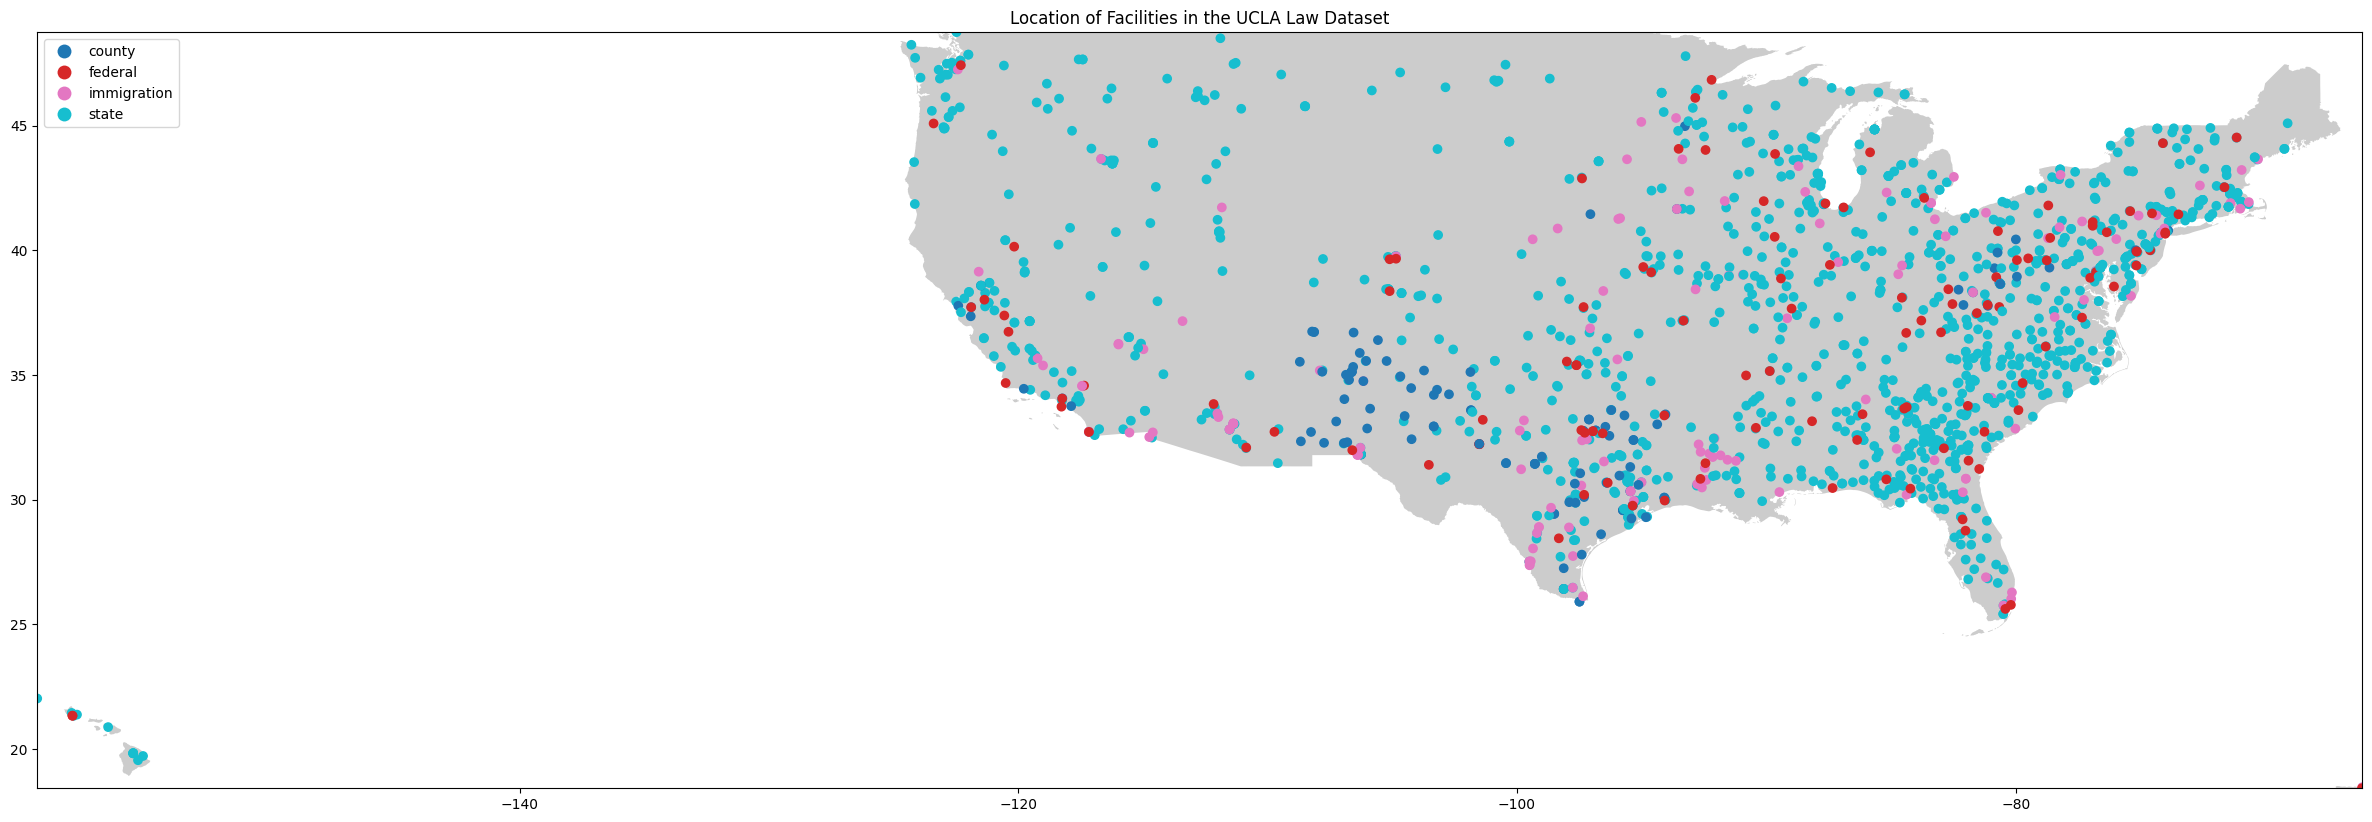

In [66]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
US = gpd.read_file('https://raw.githubusercontent.com/lindseyrogers/DH140_final_sheriffs/main/geoBoundaries-USA-ADM0_simplified.geojson')
fig, ax = plt.subplots(figsize=(30,30))
US.plot(ax=ax, alpha=0.4, color='grey')
lfc_geodf.plot(column='Jurisdiction', ax=ax, legend=True)
plt.title('Location of Facilities in the UCLA Law Dataset')

minx, miny, maxx, maxy = lfc_geodf.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)



## Text Analysis

## Works Cited

Mapping Police Violence
UCLA Law Behind Bars
Geoboundaries - ADM0 US